# Non-Cartographic Representation of Geospatial Data

Geospatial data doesn't always need to be represented on a map. Non-cartographic representations can offer unique insights and allow us to visualize relationships, connections, and patterns that might not be immediately apparent on a traditional map. Here we explore a couple of examples for visualizing geospatial data without maps.

---

**Why Use Non-Cartographic Representations?**

In some cases non-cartographic visualizations can simplify complex spatial relationships and highlight specific aspects of the data, such as the intensity of interactions between locations or the flow of goods, information, or people. They help in:

- **Simplifying Complexity**: By abstracting away geographical details, we can focus on the data's relational or structural aspects.
- **Emphasizing Connections**: Visualizing the strength and direction of relationships between entities can reveal patterns not visible on a standard map.
- **Facilitating Comparisons**: These visualizations can sometimes make it easier to compare spatial relationships across different regions or categories.

---


## Network Graphs for Visualizing Relationships and Adjacency

Network graphs are usefool tools for visualizing relationships and adjacency between various entities. They consist of nodes (or vertices) representing entities and edges (or links) denoting relationships or connections between these entities. This visualization technique is particularly useful for illustrating complex networks such as social connections, infrastructure systems, ecological networks, or various kind of transactions.

- **Advantages**: Network graphs are excellent for identifying clusters, central nodes, and the overall structure of the network. They can reveal the most influential entities within a network and how they interact with others.
- **Considerations**: With a large number of nodes and edges, network graphs can become overwhelming and difficult to interpret. Strategies such as node aggregation, edge bundling, or interactive filtering may be necessary to maintain clarity.


**Example: Visualization neighboring US states**
Here we work with a simplified data of US states and their neighbors. We want to create a graph to show their neighboring relationships. For this visualization, we use two prominent Python libraries: Matplotlib and NetworkX.

[**Matplotlib**](https://matplotlib.org/stable/contents.html) is a comprehensive library for creating static, interactive, and animated visualizations in Python. It provides an extensive array of functions and tools for creating a wide variety of plots and charts, from histograms and scatter plots to complex contour plots. 


[**NetworkX**](https://networkx.org/documentation/stable/) is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. It provides tools for working with graphs and networks, both simple and complex, with extensive functionality for adding nodes, edges, and applying various algorithms to analyze and visualize network data. We used this in the [AutoGIS course](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-6/network-analysis.html) to perform a simple network analysis on OSM data and get the shortest route between a pair of points.

Both libraries are open-source and actively maintained, making them relevant in the data science and analytics communities for data visualization and network analysis tasks. They can be used in a wide range of applications, from simple data visualizations to complex analyses of large-scale networks. 

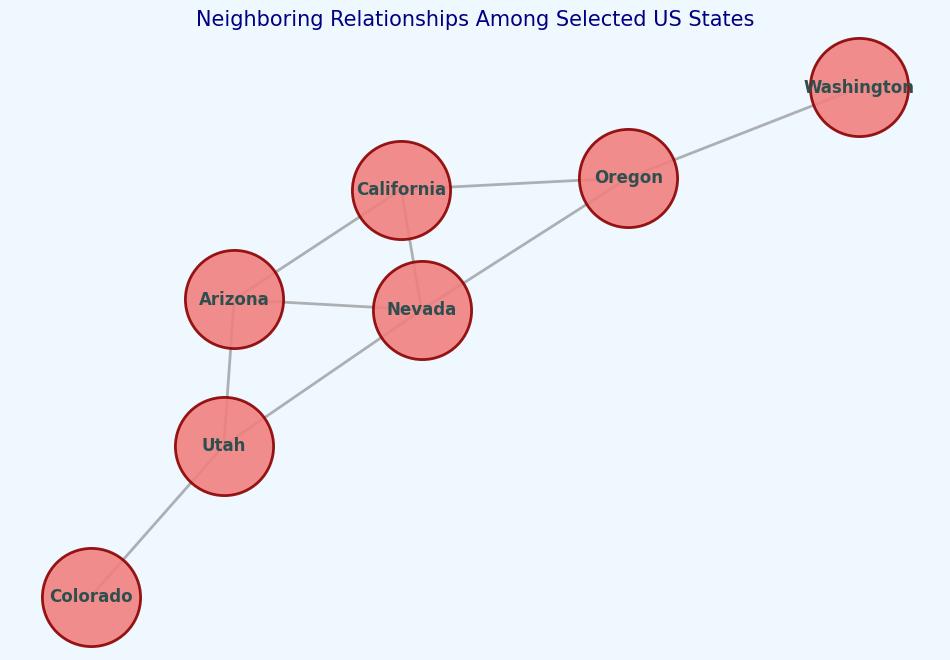

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# a simplified subset of US states and their neighbors
us_states_neighbors = {
    'California': ['Oregon', 'Nevada', 'Arizona'],
    'Oregon': ['California', 'Nevada', 'Washington'],
    'Nevada': ['Oregon', 'California', 'Arizona', 'Utah'],
    'Arizona': ['California', 'Nevada', 'Utah'],
    'Utah': ['Nevada', 'Arizona', 'Colorado'],
    'Colorado': ['Utah'],
    'Washington': ['Oregon']
}

# Create the graph
G = nx.Graph()

# Add nodes and edges based on the neighboring relationships
for state, neighbors in us_states_neighbors.items():
    G.add_node(state)
    for neighbor in neighbors:
        G.add_edge(state, neighbor)

# Generate positions for each node using a layout
pos = nx.spring_layout(G, seed=42)  # Fixed seed for reproducibility

# Customize the plot
plt.figure(figsize=(12, 8), facecolor='aliceblue')  # Set background color
plt.title('Neighboring Relationships Among Selected US States', fontsize=15, color='navy')

# Draw nodes with custom style
nx.draw_networkx_nodes(G, pos, node_size=5000, node_color='lightcoral', edgecolors='darkred', linewidths=2, alpha=0.9)

# Draw edges with custom style
nx.draw_networkx_edges(G, pos, width=2, edge_color='gray', alpha=0.6)

# Draw labels with custom font style
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='darkslategray')

# Remove axes for a cleaner look
plt.axis('off')
plt.show()


## A Chord Diagram

Chord diagrams offer a powerful way to visualize complex relationships between different entities. By arranging entities along a circle with connections (or "chords") between them, we can quickly grasp the volume and direction of interactions.

- **Advantages**: Provides a clear overview of relationships and their strengths; visually appealing and engaging.
- **Considerations**: Can become cluttered with too many entities or connections; best used when focusing on key relationships.

**Example: Visualization of Flickr nature visits by continent**
Here we use the Chord Diagram to visualize the Nature visits by continent based on Flickr data. In addition to Matplotlib and Pandas library, we use a specific library to generate this kind of diagram: [**mpl_chord_diagram**](https://codeberg.org/tfardet/mpl_chord_diagram). This Python package extends Matplotlib's capabilities to include chord diagrams, a specific type of visualization that shows inter-relationships between entities in a circular layout. 

In [2]:
import matplotlib.pyplot as plt
from mpl_chord_diagram import chord_diagram
import pandas as pd
# requirement: mpl_chord_diagram, see https://codeberg.org/tfardet/mpl_chord_diagram

C:\Users\kamya\AppData\Local\Temp\ipykernel_296\4192059479.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
od_flows = pd.read_csv("data/flickr_nature_visits_continent_od.csv", index_col=0)

In [4]:
od_flows

,Africa,Asia,Europe,North America,Oceania,Seven seas (open ocean),South America
Africa,5953,1006,12641,4733,813,6,270
Asia,247,104842,25977,12243,3741,47,1008
Europe,703,5993,661965,21741,7873,11,2937
North America,128,3268,23518,244201,2233,12,1561
Oceania,14,1906,6774,4070,47298,0,253
Seven seas (open ocean),14,69,466,115,18,68,8
South America,72,767,7333,5767,627,1,53110


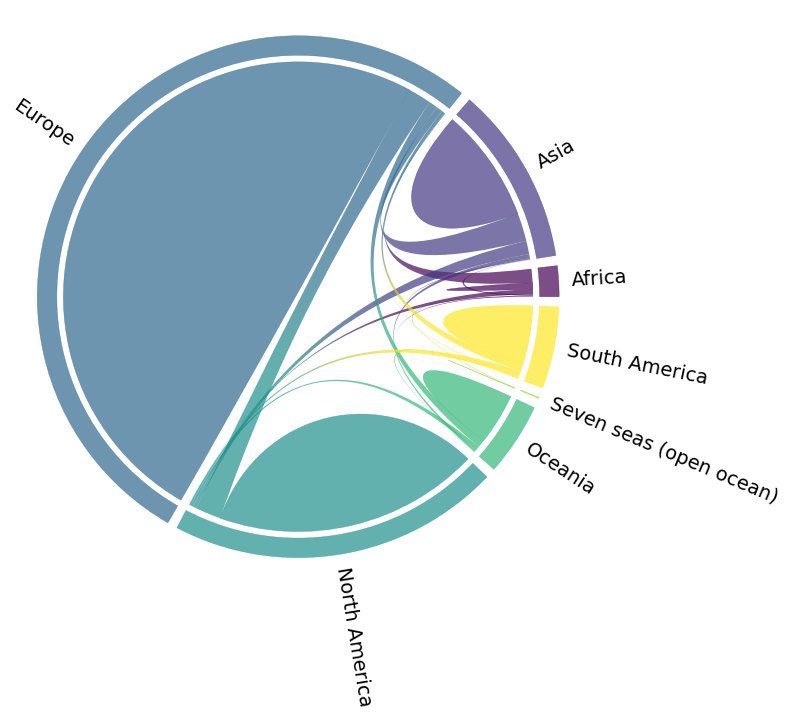

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
    
plt.rcParams['axes.titlepad'] = 40
#ax.set_title("{}".format(year))

names=od_flows.columns

# see full list of styling parameters https://codeberg.org/tfardet/mpl_chord_diagram
# or call ?chord_diagram
chord_diagram(od_flows.to_numpy(), names=names, gap=0.025, width=0.075, pad=2.25,
use_gradient=True, fontsize=14, rotate_names=True, ax=ax, directed=False)
plt.tight_layout()

### Discussion: Beyond Maps

**Think Beyond Maps**
Maps are not the only way to visualize geographical data. **Can you think of other non-cartographic methods to represent geographical information?** Consider how these alternatives might offer unique insights compared to traditional maps.

**Share Your Ideas**
- **Examples**: Can you come up with examples?
- **Data**: What kind of data are these most suitable for?
- **Benefits**: What advantages could these methods have? When might they be more effective than maps?